# TEXT MINING for PRACTICE: 동시출현 매트릭스
---

In [1]:
import sys
!{sys.executable} -m pip install konlpy

In [2]:
!mkdir data
!wget -O data/article_sample.txt https://raw.githubusercontent.com/thejungwon/text-mining-course/master/practice/week-07/data/article_sample.txt
!wget -O data/stopword.txt https://raw.githubusercontent.com/thejungwon/text-mining-course/master/practice/week-07/data/stopword.txt

mkdir: data: File exists
--2019-11-15 11:43:53--  https://raw.githubusercontent.com/thejungwon/text-mining-course/master/practice/week-07/data/article_sample.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.72.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.72.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 345708 (338K) [text/plain]
Saving to: ‘data/article_sample.txt’

data/article_sample 100%[===================>] 337.61K   263KB/s    in 1.3s    

2019-11-15 11:43:55 (263 KB/s) - ‘data/article_sample.txt’ saved [345708/345708]

--2019-11-15 11:43:55--  https://raw.githubusercontent.com/thejungwon/text-mining-course/master/practice/week-07/data/stopword.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.72.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.72.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1

## 1. 전처리 후 Term 로딩

In [3]:
import csv
from konlpy.tag import Okt
okt = Okt()

contents = []
with open('data/article_sample.txt', encoding="utf-8") as tsvfile:
    reader = csv.reader(tsvfile, delimiter='\t')
    for row in reader:
        #0: 토픽, 1: 출처, 2: 날짜, 3: 제목, 4: 내용 
        contents.append(row[4])      

stops_words = []
with open('data/stopword.txt', encoding="utf-8") as f:
    for line in f.readlines():
        stops_words.append(line.strip())
stops_words+=[
    '것', '수', '등'
]
POS_LIST = ["Noun"]
tokenized_sentence_list = []
for content in contents:
    tokens = []
    for pos in okt.pos(content):
        #Q Condition 부분을 완성하시오
        condition = pos[1] in POS_LIST and pos[0] not in stops_words
        if condition:
            tokens.append(pos[0])
    tokenized_sentence_list.append(tokens)

tokenized_sentence_list[:10]

/Users/seojungwon/anaconda3/lib/python3.6/site-packages/jpype/_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


[['금융',
  '비트코인',
  '쇠락',
  '재적',
  '결함',
  '보고서',
  '넷',
  '코리아',
  '손',
  '예술',
  '기자',
  '대표',
  '암호',
  '화폐',
  '비트코인',
  '가격',
  '급',
  '변동',
  '불구',
  '일부',
  '암호',
  '화폐',
  '옹호',
  '론자',
  '비트코인',
  '몇',
  '가지',
  '결함',
  '해소',
  '국면',
  '예측',
  '그',
  '결함',
  '전제',
  '국내외',
  '정부',
  '감독',
  '당국',
  '선제',
  '시각',
  '및',
  '규제',
  '환경',
  '정비',
  '주장',
  '한국',
  '금융',
  '연구원',
  '비트코인',
  '쇠락',
  '재적',
  '결함',
  '보고서',
  '암호',
  '화폐',
  '옹호',
  '론',
  '입장',
  '그',
  '제시',
  '세',
  '가지',
  '결함',
  '발표',
  '여기',
  '암호',
  '화폐',
  '옹호',
  '론자',
  '암호',
  '화폐',
  '부가가치',
  '낼',
  '사업',
  '모델',
  '등장',
  '가능성',
  '집중',
  '인물',
  '통칭',
  '그',
  '위해',
  '비트코인',
  '세',
  '가지',
  '결함',
  '우선',
  '해소',
  '보고',
  '하나',
  '비트코인',
  '재화',
  '용역',
  '구입',
  '사용',
  '시장',
  '미국',
  '비트코인',
  '시장조사',
  '기관',
  '사토시',
  '캐피탈',
  '리서치',
  '지난',
  '기준',
  '비트코인',
  '사용',
  '거래',
  '결제',
  '액',
  '약',
  '중국',
  '알리페',
  '위챗',
  '페이',
  '거래',
  '결제',
  '액',
  '약',
  '감안',
  '시장',
  '두',
  '번',
  '비

## 2. 동시출현 빈도 저장 key = (word1, word2), value = 횟수

In [4]:
count = {}   #동시출현 빈도가 저장될 dict
for article in tokenized_sentence_list:
    article = list(set(article))
    for i, a in enumerate(article):
        for b in article[i:]:
            if a == b: continue   #같은 단어의 경우는 세지 않음
            if a > b: a, b = b, a   #A, B와 B, A가 다르게 세어지는것을 막기 위해 항상 a < b로 순서 고정
            count[a, b] = count.get((a, b), 0) + 1   #실제로 센다
count

{('가격', '중'): 396,
 ('가격', '점'): 187,
 ('가격', '저장'): 5,
 ('가격', '정보'): 7,
 ('가격', '주장'): 15,
 ('가격', '부과'): 4,
 ('가격', '비자'): 1,
 ('가격', '개월'): 3,
 ('가격', '설립'): 5,
 ('가격', '구성'): 5,
 ('가격', '실험'): 4,
 ('가격', '구입'): 405,
 ('가격', '알리페'): 1,
 ('가격', '각'): 3,
 ('가격', '완료'): 3,
 ('가격', '연결'): 3,
 ('가격', '가늠'): 1,
 ('가격', '강화'): 5,
 ('가격', '사용'): 3,
 ('가격', '기반'): 13,
 ('가격', '몇'): 4,
 ('가격', '며'): 8,
 ('가격', '집중'): 1,
 ('가격', '사의'): 1,
 ('가격', '쇠락'): 1,
 ('가격', '기자'): 24,
 ('가격', '계좌'): 1,
 ('가격', '통화'): 260,
 ('가격', '안정'): 3,
 ('가격', '차단'): 1,
 ('가격', '전자지갑'): 1,
 ('가격', '디지털'): 184,
 ('가격', '서술'): 1,
 ('가격', '유동성'): 3,
 ('가격', '넷'): 3,
 ('가격', '가능성'): 215,
 ('가격', '블록'): 592,
 ('가격', '여기'): 2,
 ('가격', '확보'): 2,
 ('가격', '관리'): 5,
 ('가격', '우선'): 181,
 ('가격', '역할'): 3,
 ('가격', '두'): 378,
 ('가격', '재화'): 1,
 ('가격', '참가자'): 1,
 ('가격', '입장'): 7,
 ('가격', '국내외'): 2,
 ('가격', '캐피탈'): 2,
 ('가격', '세'): 184,
 ('가격', '파산관재인'): 1,
 ('가격', '분'): 2,
 ('가격', '및'): 593,
 ('가격', '달'): 4,
 ('가격', '사토시'): 2,
 

## 3. 빈도 순으로 정렬

In [5]:

sorted_x = sorted(count.items(), key=lambda kv: kv[1], reverse=True)
sorted_x[:20]

[(('가치', '암호'), 912),
 (('가산', '잔액'), 875),
 (('가산', '기준'), 875),
 (('가격', '금융'), 860),
 (('가격', '사실'), 845),
 (('가격', '글'), 841),
 (('가지', '위해'), 798),
 (('가치', '때문'), 789),
 (('가능성', '때문'), 770),
 (('개', '경우'), 738),
 (('가능성', '및'), 720),
 (('가산', '방안'), 709),
 (('가치', '라며'), 697),
 (('간', '은행'), 695),
 (('가장', '말'), 690),
 (('가능성', '비트코인'), 689),
 (('가능성', '상황'), 683),
 (('가능성', '통해'), 674),
 (('가감', '금융위'), 674),
 (('가감', '기준금리'), 674)]

## 4. Top N 빈번한 조합 선택

In [6]:
TOP_N = 30

In [7]:
#행/열의 이름을 나타내기 위한 과정

unique_terms = []
for k,v in sorted_x[:TOP_N]:
    unique_terms+=list(k)
print(len(unique_terms))
unique_terms=list(set(unique_terms))
print(len(unique_terms))
unique_terms= sorted(unique_terms)
unique_terms

60
35


['가감',
 '가격',
 '가능성',
 '가산',
 '가장',
 '가지',
 '가치',
 '간',
 '개',
 '경우',
 '글',
 '금융',
 '금융위',
 '기준',
 '기준금리',
 '당국',
 '때문',
 '라며',
 '말',
 '및',
 '방안',
 '배포',
 '변동',
 '비트코인',
 '사실',
 '상황',
 '암호',
 '위',
 '위해',
 '은행',
 '인하',
 '잔액',
 '통해',
 '포인트',
 '현재']

## 5. 매트릭스 초기화

In [8]:
import numpy as np
word_index = {}
for index, term in enumerate(unique_terms):
    word_index[term] = index
print(word_index)

matrix = np.zeros((len(unique_terms),len(unique_terms)))
print(matrix)


{'가감': 0, '가격': 1, '가능성': 2, '가산': 3, '가장': 4, '가지': 5, '가치': 6, '간': 7, '개': 8, '경우': 9, '글': 10, '금융': 11, '금융위': 12, '기준': 13, '기준금리': 14, '당국': 15, '때문': 16, '라며': 17, '말': 18, '및': 19, '방안': 20, '배포': 21, '변동': 22, '비트코인': 23, '사실': 24, '상황': 25, '암호': 26, '위': 27, '위해': 28, '은행': 29, '인하': 30, '잔액': 31, '통해': 32, '포인트': 33, '현재': 34}
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## 6. 해당하는 위치에 빈도 값 저장

In [9]:
# Option 1
for k,v in sorted_x[:30]:
    matrix[word_index[k[0]],word_index[k[1]]] = v
    matrix[word_index[k[1]],word_index[k[0]]] = v
matrix

array([[  0.,   0.,   0., ...,   0., 674.,   0.],
       [  0.,   0.,   0., ...,   0.,   0., 668.],
       [  0.,   0.,   0., ..., 674.,   0.,   0.],
       ...,
       [  0.,   0., 674., ...,   0.,   0.,   0.],
       [674.,   0.,   0., ...,   0.,   0.,   0.],
       [  0., 668.,   0., ...,   0.,   0.,   0.]])

In [10]:
# Option 2
for k,v in sorted_x[:30]:
    matrix[word_index[k[0]],word_index[k[1]]] = v
matrix = np.maximum( matrix, matrix.transpose() )
matrix

array([[  0.,   0.,   0., ...,   0., 674.,   0.],
       [  0.,   0.,   0., ...,   0.,   0., 668.],
       [  0.,   0.,   0., ..., 674.,   0.,   0.],
       ...,
       [  0.,   0., 674., ...,   0.,   0.,   0.],
       [674.,   0.,   0., ...,   0.,   0.,   0.],
       [  0., 668.,   0., ...,   0.,   0.,   0.]])

## 7. Heat Map으로 시각화

In [11]:
#https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/image_annotated_heatmap.html#sphx-glr-gallery-images-contours-and-fields-image-annotated-heatmap-py

def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["black", "white"],
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A list or array of two color specifications.  The first is used for
        values below a threshold, the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

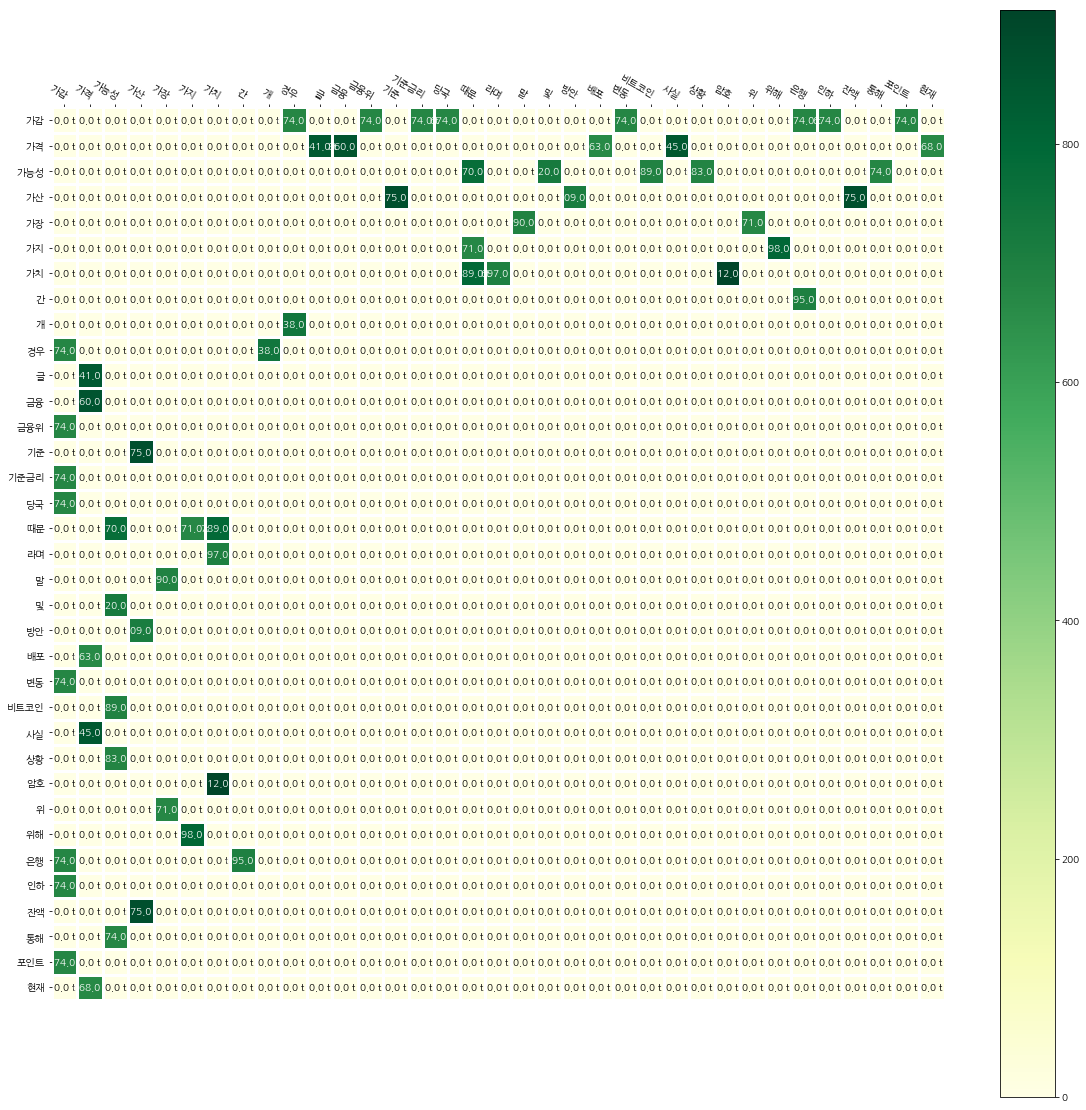

In [12]:
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["font.family"] = 'NanumGothic'
fig, ax = plt.subplots(figsize=(20, 20))

im, cbar = heatmap(matrix, unique_terms, unique_terms, ax=ax,
                   cmap="YlGn", )
texts = annotate_heatmap(im, valfmt="{x:.1f} t")

# fig.tight_layout()

plt.show()



## 8. 그래프로 시각화

In [13]:
import sys
!{sys.executable} -m pip install pyvis

In [14]:
from pyvis.network import Network
import networkx as nx
nxg = nx.complete_graph(10)
G = Network(notebook="True")
G.from_nx(nxg)
G.show("example.html")

In [15]:
import pandas as pd

got_net = Network(height="750px", width="100%", bgcolor="#222222", font_color="white", notebook=True)

# set the physics layout of the network
got_net.barnes_hut()
got_data = pd.read_csv("https://www.macalester.edu/~abeverid/data/stormofswords.csv")

sources = got_data['Source']
targets = got_data['Target']
weights = got_data['Weight']

edge_data = zip(sources, targets, weights)


for e,v in sorted_x[:100]:
    src = e[0]
    dst = e[1]
    w = v

    got_net.add_node(src, src, title=src)
    got_net.add_node(dst, dst, title=dst)
    got_net.add_edge(src, dst, value=w)

neighbor_map = got_net.get_adj_list()

# add neighbor data to node hover data
for node in got_net.nodes:
    node["title"] += " Neighbors:<br>" + "<br>".join(neighbor_map[node["id"]])
    node["value"] = len(neighbor_map[node["id"]])

got_net.show("graph.html")